In [2]:
%matplotlib inline


# The Iris Dataset
This data sets consists of 3 different types of irises'
(Setosa, Versicolour, and Virginica) petal and sepal
length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being:
Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features.
See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more
information on this dataset.


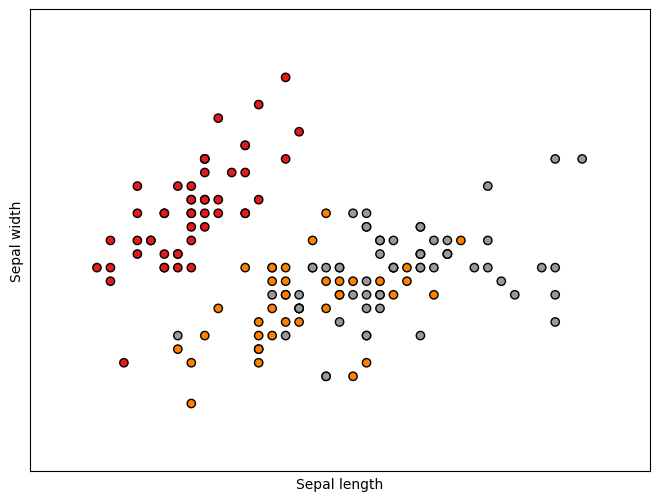

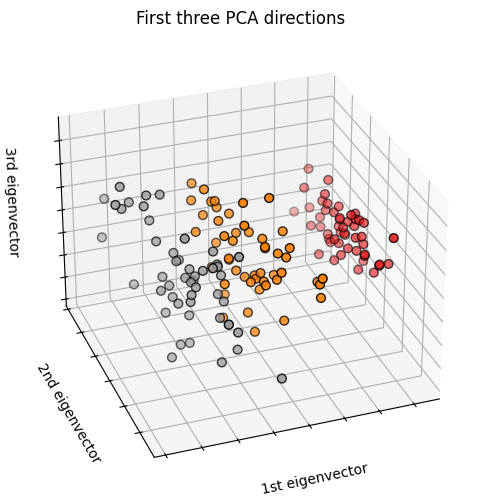

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.savefig("iris_dataset.png")
plt.show()

In [4]:
import numpy as np
import random
import functions as fn 

In [7]:
train_path = '../processed/'
model_path = '../models/'
model_name_suffix = '_final_subm'
offset_amount = 0.07# fraction of the train set to use as hold out
num_over = 2
num_threads  = 7
#generate trainset, labels, and test set based on the number of valid radar readings in the original dataset. 
train, integer_labels,actual_labels, cutoff = fn.load_train_data(train_path,1,1,offset_amount)

#drop the columns with constant values  
train = train.loc[:,train.mean() != -99999]

#aggregate the original labels into 3 groups, 0mm,1mm, and 2-69mm
reduced_labels = fn.aggregate_labels([[range(2,70),2]], integer_labels).iloc[:,0] #.iloc becuase series and df don't behave the same

#split into a train and validation set for early stopping, this makes the call to xgb readable
data = (train.iloc[cutoff:,:],reduced_labels.iloc[cutoff:],train.iloc[:cutoff,:],reduced_labels.iloc[:cutoff])

In [29]:
data[3].count()

11092

In [31]:
X_reduced = PCA(n_components=3).fit_transform(data[0])

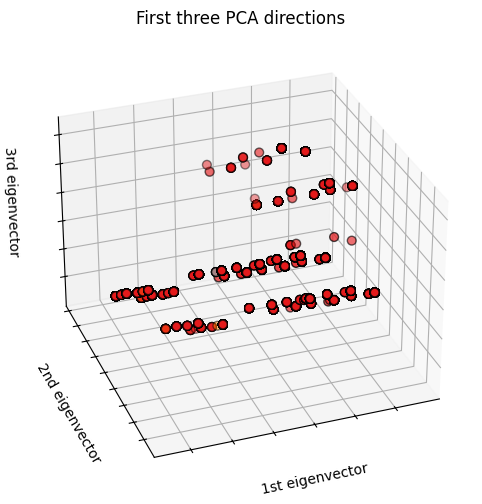

In [38]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=data[1],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.savefig("iris_dataset.png")
plt.show()

In [62]:
data[0].columns.values

array(['MassWeightedMean_num_non_null', 'MassWeightedMean_mean',
       'MassWeightedMean_min', 'MassWeightedMean_max',
       'MassWeightedMean_med', 'MassWeightedMean_sum',
       'MassWeightedSD_num_non_null', 'MassWeightedSD_mean',
       'MassWeightedSD_min', 'MassWeightedSD_max', 'MassWeightedSD_med',
       'MassWeightedSD_sum', 'RR1_num_00', 'RR1_num_non_null', 'RR1_mean',
       'RR1_min', 'RR1_max', 'RR1_med', 'RR1_sum',
       'ReflectivityQC_num_00', 'ReflectivityQC_num_03',
       'ReflectivityQC_num_non_null', 'ReflectivityQC_mean',
       'ReflectivityQC_min', 'ReflectivityQC_max', 'ReflectivityQC_med',
       'ReflectivityQC_sum', 'LogWaterVolume_num_non_null',
       'LogWaterVolume_mean', 'LogWaterVolume_min', 'LogWaterVolume_max',
       'LogWaterVolume_med', 'LogWaterVolume_sum',
       'Reflectivity_num_non_null', 'Reflectivity_mean',
       'Reflectivity_min', 'Reflectivity_max', 'Reflectivity_med',
       'Reflectivity_sum', 'Composite_num_00', 'Composite_num_non

In [56]:
data[0].values[:, [0, 1]]

array([[     0., -99999.],
       [     0., -99999.],
       [     0., -99999.],
       ...,
       [     0., -99999.],
       [     0., -99999.],
       [     0., -99999.]])